# Twitter did not come back on my Academic research application.
# So I proceeded to work with the Archive analysis from
# kaggle

In [92]:
# sc master - running locally
sc.master

'local[*]'

In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
%pylab inline
import os
import pyspark

# spark is from the previous example.
sc = spark.sparkContext

Populating the interactive namespace from numpy and matplotlib


In [95]:
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import warnings
import gzip
import json
import os
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
%matplotlib inline

In [ ]:
# ittertools required for reading the gzip files but is depricated in pandas 2.0
# pip install pandas==1.5.3


In [55]:
print(pd.__version__)

1.5.3


In [96]:
# Set up empty pyspark dataframe to store the imported tweets
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType,TimestampType

spark = SparkSession.builder.getOrCreate() #Start a spark session
# Defining the schema of the pyspark dataframe
schema = StructType([
    StructField("date_extracted", TimestampType(), True),
    StructField("tweet", StringType(), True)
])
stwit_df = spark.createDataFrame([], schema) # make empty dataframe
# show the dataframe is as set out
stwit_df.show()


+--------------+-----+
|date_extracted|tweet|
+--------------+-----+
+--------------+-----+



In [46]:
# Function to extract tweets from gzip file , filter and store out to pyspark dataframe

def extract_csv_from_directory(directory, stwit_df):
    """Function to unzip and extract all json all files in a given directory"""

    for file_name in os.listdir(directory):
        if file_name.endswith('.csv.gzip'):
            print(f"Extracting file {file_name} ")
            file_path = os.path.join(directory, file_name)
            with gzip.open(file_path, 'r') as file:
                df = pd.read_csv(file) #read the file as a pandas dataframe
                filter1 = (df['language'] == 'en') & (df['location'] == 'Ukraine') # a filter for english language and location Ukraine
                df = df[filter1] # Selects dataframe based on the filter
                df = df[['extractedts','text']] # outputs only the columns im looking for date and text
                # convert datetime to date object to avoid 'NonExistantTimeError' due to daylight saving changes. 
                df['extractedts'] = pd.to_datetime(df['extractedts'], errors='ignore').dt.date
                df['text'] = df['text'].astype(str) # convert string to string object
                sdf = spark.createDataFrame(df) # convert pandas DF to PySpark DF
                stwit_df = stwit_df.union(sdf) # append the result to my PySpark DF
       

    return stwit_df


directory = "/media/hduser/TOSHIBA_EXT/archive_copy"
cbdf = extract_csv_from_directory(directory,stwit_df)
cbdf.show()


Extracting file 0401_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0402_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0403_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0404_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0405_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0406_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0407_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0408_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0409_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0410_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0411_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0412_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0413_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0414_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0415_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0416_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 0417_UkraineCombinedTwee

Extracting file UkraineCombinedTweetsDeduped_FEB27.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_FEB28_part1.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_FEB28_part2.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR01.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR02.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR03.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR04.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR05.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR06.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR07.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR08.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR09.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR10.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR11.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR12.csv.gzip 
Extracting file UkraineCombinedTweetsDeduped_MAR13.csv.gzip 
Extracting f

Extracting file 1130_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1201_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1202_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1203_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1204_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1205_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1206_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1207_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1208_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1209_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1210_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1211_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1212_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1213_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1214_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1215_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 1216_UkraineCombinedTwee

Extracting file 20230410_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230411_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230412_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230413_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230414_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230415_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230416_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230417_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230418_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230419_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230420_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230421_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230422_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230423_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230424_UkraineCombinedTweetsDeduped.csv.gzip 
Extracting file 20230425_UkraineCombined

2023-05-23 19:12:32,217 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 2.1 MiB
2023-05-23 19:12:33,257 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 2.1 MiB


+-------------------+--------------------+
|     date_extracted|               tweet|
+-------------------+--------------------+
|2022-04-01 00:00:00|❗️🏫Every school ...|
|2022-04-01 00:00:00|One year ago #Ukr...|
|2022-04-01 00:00:00|JUST IN: #Anonymo...|
|2022-04-01 00:00:00|Chernihiv oblast....|
|2022-04-01 00:00:00|⚡The Ukrainian Ai...|
|2022-04-01 00:00:00|Help to save Ukra...|
|2022-04-01 00:00:00|Help to save Ukra...|
|2022-04-01 00:00:00|✨ Angelina Jolie ...|
|2022-04-01 00:00:00|This is not the t...|
|2022-04-01 00:00:00|#notallrussians??...|
|2022-04-01 00:00:00|⚡The Ukrainian Ai...|
|2022-04-01 00:00:00|🇬🇧🇺🇦How is th...|
|2022-04-01 00:00:00|Grandmother with ...|
|2022-04-01 00:00:00|An activist with ...|
|2022-04-01 00:00:00|⚡The Ukrainian Ai...|
|2022-04-01 00:00:00|The first leader ...|
|2022-04-01 00:00:00|The greatest army...|
|2022-04-01 00:00:00|Ukrainian army so...|
|2022-04-01 00:00:00|1/ Before tomorro...|
|2022-04-01 00:00:00|#Latvia has banne...|
+---------------

In [97]:
print(f'Count of rows:{cbdf.count()}')

Count of rows:299821


In [98]:
print(f'Count of distinct rows: {cbdf.distinct().count()}')

Count of distinct rows: 299821


In [50]:
# There are 72676 duplicate row
cbdf = cbdf.dropDuplicates()

In [52]:
# save the file to Hadoop HDFS
cbdf.write.parquet('hdfs://localhost:9000/user1/Ukraine_twitter.parquet')

AnalysisException: path hdfs://localhost:9000/user1/Ukraine_twitter.parquet already exists.

In [99]:
cbdf.write.csv('hdfs://localhost:9000/user1/Ukraine_twitter.csv')

AnalysisException: path hdfs://localhost:9000/user1/Ukraine_twitter.csv already exists.

In [40]:
print(f'Number of rows with missing values : {df.isnull().any(axis=1).mean()}')

Number of rows with missing values : 0.0


# twitter sentiment analysis

In [101]:
import nltk
from dotenv import dotenv_values
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [102]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/hduser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
# read the file from hadoop
sc = spark.sparkContext
from pyspark.sql import SQLContext
sqlContex = SQLContext(sc)
cbdf = sqlContex.read.parquet('hdfs://localhost:9000/user1/Ukraine_twitter.parquet')

In [103]:
# im working with my saved csv file here as it works better with nltk and textblob
pdf = cbdf.toPandas()

In [104]:
# using regular expressions to remove all special charecters.
pdf["tweet"] = pdf['tweet'].str.replace('[^\w\s]','')

In [105]:
# using regular expressions to remove all tabs and carrige returns that were imported in original csv
pdf["tweet"] = pdf['tweet'].str.replace(r'\r\n','')

In [106]:
# Basically stop words like this, an, a, the, etc that do not affect the meaning of the tweet will be removed
from nltk.corpus import stopwords
stop = stopwords.words("english")

In [107]:
pdf['tweet'] = pdf['tweet'].astype(str)

In [108]:
# lambda counts the  number of stop words in each tweet
pdf["stopwords"]  = pdf["tweet"].apply(lambda x : len([x for x in x.split() if x in stop]))

In [109]:
# lambda counts the number of upper case words in tweet , indicate shouting , anger ect
pdf["upper"]  = pdf["tweet"].apply(lambda x : len([x for x in x.split() if x.isupper()]))

In [110]:
pdf['tweet'] = pdf['tweet'].astype(str)

In [79]:
##################### Warning this cell can take up to 50 mins to complete ################### 
# corrects spellings and grammer based on context
# use txtblob to correct the tweet spelling
from textblob import TextBlob
pdf['tweets_correct']= pdf["tweet"].apply(lambda x : str(TextBlob(x).correct()))
# pattern matching is not good

KeyboardInterrupt: 

In [111]:
from textblob import TextBlob
pdf['sentiment'] = pdf['tweet'].apply(lambda x : TextBlob(x).sentiment[0])

In [112]:
# add month column to dataframe
pdf['month'] = pdf['date_extracted'].dt.month

In [113]:
pdf.tail()

,date_extracted,tweet,stopwords,upper,sentiment,month
299816,2023-04-27,PACE resolution on deportation of Ukrainian c...,10,1,0.000000,4
299817,2023-05-04,walken_io Problem was solved via Walken team a...,2,0,0.000000,5
299818,2023-05-12,Part of the proceeds 20 from the sale of each ...,17,1,0.066667,5
299819,2023-05-12,Confirmation that the Armed Forces of Ukraine ...,12,0,0.000000,5
299820,2023-05-17,Kyiv last night Air alert during what was one ...,9,1,0.233333,5


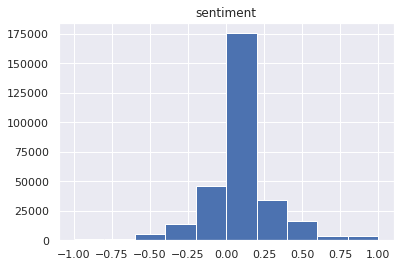

In [114]:
# Get instant view of the sentiment
pdf.hist(column='sentiment')
#plt.savefig("ukraine_sent_hist.png", dpi=300)
plt.show();

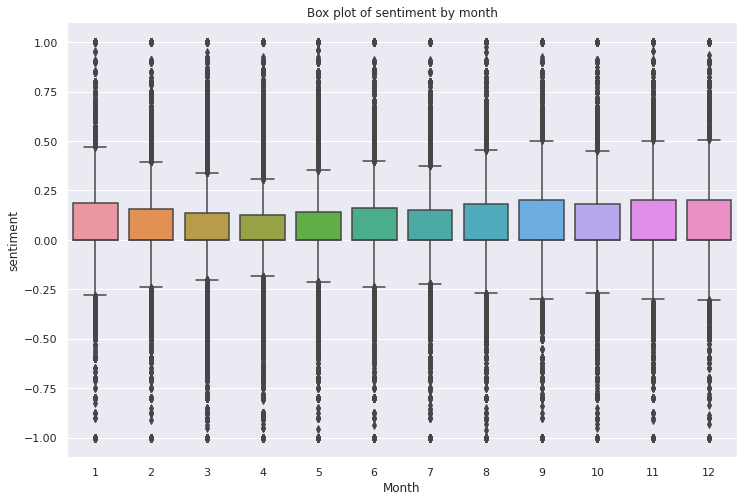

In [115]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month', y='sentiment', data=pdf)
plt.title('Box plot of sentiment by month')
plt.xlabel('Month')
plt.ylabel('sentiment')
plt.savefig("ukraine_sent_box.png", dpi=300)
plt.show()

In [40]:
# group by date and add up the sentiment score in each group.
# devide the sentiment score by the number of tweets in each day for the average sentiment score for that day
# create new dataset with the sentiment for each day.
tsdf = pdf.groupby('date_extracted').agg(sum_sentiment=('sentiment', 'sum'), rows = ('sentiment','count')
                                        ).assign(result=lambda x : x['sum_sentiment'] / x['rows']).reset_index()[['date_extracted', 'result']]

In [116]:
tsdf.head()

,result
date_extracted,
2022-02-24,0.022676
2022-02-25,0.021433
2022-02-26,0.053351
2022-02-27,0.035189
2022-02-28,0.025210


In [119]:
# save point for dataframe
tsdf.to_csv('timeseries_tweet.csv')

In [120]:
tsdf['date_extracted'] = pd.to_datetime(tsdf['date_extracted'])
tsdf.set_index('date_extracted',inplace=True)

KeyError: 'date_extracted'

In [45]:
tsdf.head()

,result
date_extracted,
2022-02-24,0.022676
2022-02-25,0.021433
2022-02-26,0.053351
2022-02-27,0.035189
2022-02-28,0.025210


# Ukraine weather data.

In [95]:
uw = pd.read_csv('ukraine 2022-02-24 to 2023-06-08.csv')
uw.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,ukraine,2022-02-24,5.3,1.9,2.9,5.3,-0.6,1.9,1.2,88.9,...,2.8,2,10,2022-02-24T06:52:22,2022-02-24T17:30:44,0.75,"Snow, Rain, Overcast",Cloudy skies throughout the day with morning r...,rain,"UKKK,UKBB,33347099999,33345199999,33345099999,..."
1,ukraine,2022-02-25,6.0,-1.0,2.6,4.5,-1.0,1.2,-0.4,81.9,...,10.9,4,10,2022-02-25T06:50:21,2022-02-25T17:32:27,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"UKKK,33345099999"
2,ukraine,2022-02-26,8.0,0.0,3.8,4.7,-3.1,0.8,-2.7,65.9,...,10.4,4,10,2022-02-26T06:48:19,2022-02-26T17:34:10,0.85,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"UKKK,33345099999,remote"
3,ukraine,2022-02-27,4.8,-0.9,1.3,1.9,-3.9,-1.5,-4.6,66.0,...,7.2,3,10,2022-02-27T06:46:16,2022-02-27T17:35:52,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,remote
4,ukraine,2022-02-28,2.8,-3.6,-0.7,-1.3,-7.6,-4.5,-6.9,64.4,...,11.9,4,10,2022-02-28T06:44:12,2022-02-28T17:37:34,0.92,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,remote


In [96]:
uw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              470 non-null    object 
 1   datetime          470 non-null    object 
 2   tempmax           470 non-null    float64
 3   tempmin           470 non-null    float64
 4   temp              470 non-null    float64
 5   feelslikemax      470 non-null    float64
 6   feelslikemin      470 non-null    float64
 7   feelslike         470 non-null    float64
 8   dew               470 non-null    float64
 9   humidity          470 non-null    float64
 10  precip            470 non-null    float64
 11  precipprob        470 non-null    float64
 12  precipcover       470 non-null    float64
 13  preciptype        301 non-null    object 
 14  snow              470 non-null    float64
 15  snowdepth         470 non-null    float64
 16  windgust          470 non-null    float64
 1

In [97]:
#convert date column to datetime object
uw['datetime'] = pd.to_datetime(uw['datetime'], format='%Y-%m-%d')

In [98]:
uw1 = uw[['feelslikemax','datetime']]

In [99]:
uw1.head()

,feelslikemax,datetime
0,5.3,2022-02-24
1,4.5,2022-02-25
2,4.7,2022-02-26
3,1.9,2022-02-27
4,-1.3,2022-02-28


In [100]:
uw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   feelslikemax  470 non-null    float64       
 1   datetime      470 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.5 KB


In [101]:
uw2 = uw1[uw1['datetime'] > pd.to_datetime("2022-02-23", format='%Y-%m-%d')]
uw2.head()

,feelslikemax,datetime
0,5.3,2022-02-24
1,4.5,2022-02-25
2,4.7,2022-02-26
3,1.9,2022-02-27
4,-1.3,2022-02-28


In [102]:
uw2.set_index('datetime', inplace=True)

In [103]:
uw2.head()

,feelslikemax
datetime,
2022-02-24,5.3
2022-02-25,4.5
2022-02-26,4.7
2022-02-27,1.9
2022-02-28,-1.3


In [104]:
tsdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 448 entries, 2022-02-24 to 2023-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   result  448 non-null    float64
dtypes: float64(1)
memory usage: 7.0 KB


# Time series analysis

In [121]:
# pip install statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

#relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [122]:
tsdf['datetime'] = pd.to_datetime(tsdf['datetime'])
tsdf.set_index('datetime',inplace=True)

KeyError: 'datetime'

In [123]:
tsdf.tail()

,result
date_extracted,
2023-05-13,0.049336
2023-05-14,0.134309
2023-05-15,0.092732
2023-05-17,0.076367
2023-05-18,0.035929


In [108]:
tsdfw = tsdf.join(uw2)

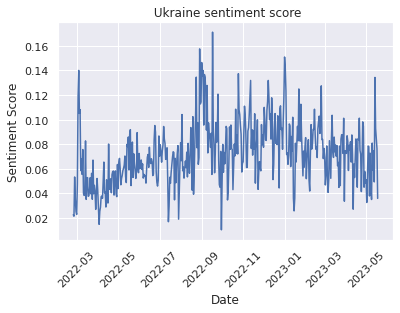

In [124]:
# Seaborn plot of sentiment data
sns.set()
plt.title(' Ukraine sentiment score')
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(tsdf.index,tsdf['result'], )
plt.savefig("ukraine_sent_time_series.png", dpi=300)

In [125]:
# Split the data in test and train data taking one year for training
train = tsdf[tsdf.index < pd.to_datetime("2023-03-01",format='%Y-%m-%d')]
test = tsdf[tsdf.index >= pd.to_datetime("2023-03-01",format='%Y-%m-%d')]

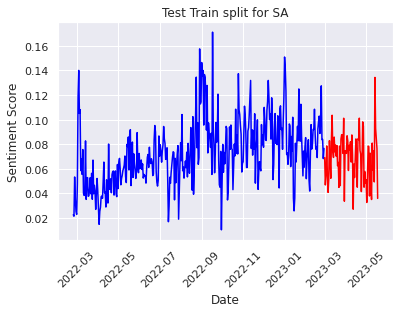

In [126]:
plt.title('Test Train split for SA')
plt.plot(train, color='blue')
plt.plot(test, color='red')
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
#plt.plot(tsdf.index,tsdf['result'], )
plt.savefig("Test_Train_split_for_SA.png", dpi=300)

In [127]:
# Function to perform the Dickey-Fuller(ADF) test 
# and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to test for stationary
# in the time series

def adf_kpss_test(df,col_name):
    """ Function to print the ADF and KPSS results of a time series dataframe"""
    time_series = df[col_name]
    adf_result = adfuller(time_series)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    for key, value in adf_result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    
    # KPSS Test
    kpss_result = kpss(time_series, nlags='auto')
    print('\nKPSS Statistic: %f' % kpss_result[0])
    print('p-value: %f' % kpss_result[1])
    for key, value in kpss_result[3].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
adf_kpss_test(tsdf,'result')

ADF Statistic: -3.970185942886321
p-value: 0.0015749295008655282
Critial Values:
   1%, -3.445299682487321
Critial Values:
   5%, -2.8681312035123967
Critial Values:
   10%, -2.570280872933884

KPSS Statistic: 1.214148
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.39745D+00    |proj g|=  1.56765D+00

At iterate    5    f= -2.39784D+00    |proj g|=  6.76619D-01

At iterate   10    f= -2.40508D+00    |proj g|=  5.57511D+00

At iterate   15    f= -2.41144D+00    |proj g|=  3.96092D-03

At iterate   20    f= -2.41145D+00    |proj g|=  1.42689D-01

At iterate   25    f= -2.41253D+00    |proj g|=  9.78801D-01

At iterate   30    f= -2.41391D+00    |proj g|=  9.46927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N 

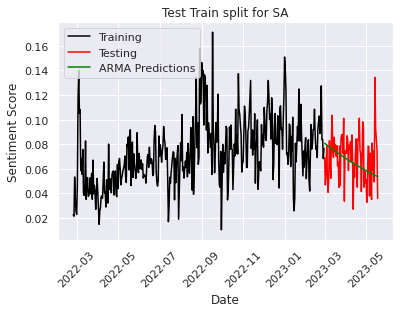

In [128]:
y = train['result']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Test Train split for SA")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.savefig("Test_Train_split_ARMA_Pred_SA.png", dpi=300)
plt.show()


In [129]:
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["result"].values, y_pred_df["Predictions"]))
print("ARMA RMSE: ",arma_rmse)

ARMA RMSE:  0.02078733649950192


In [130]:
ARIMAmodel = SARIMAX(y, order = (2, 2, 2))
#ARIMAmodel = SARIMAX(y, order = (2, 3, 2))
#ARIMAmodel = SARIMAX(y, order = (5, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0],
                                              end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARIMA = y_pred_df["Predictions"]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.33019D+00    |proj g|=  4.46058D+00

At iterate    5    f= -2.33386D+00    |proj g|=  1.44178D+00

At iterate   10    f= -2.34152D+00    |proj g|=  5.32513D-01

At iterate   15    f= -2.34156D+00    |proj g|=  1.46381D-02

At iterate   20    f= -2.34161D+00    |proj g|=  9.67725D-03

At iterate   25    f= -2.34161D+00    |proj g|=  1.93672D-02

At iterate   30    f= -2.34165D+00    |proj g|=  1.94618D-01

At iterate   35    f= -2.34304D+00    |proj g|=  1.92568D-01

At iterate   40    f= -2.34349D+00    |proj g|=  4.14559D-01

At iterate   45    f= -2.34372D+00    |proj g|=  1.09033D-02
  ys=-3.097E-06  -gs= 5.830E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segmen

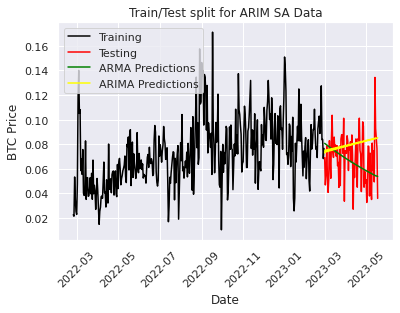

In [131]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for ARIM SA Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.savefig("Test_Train_split_ARIM_Pred_SA.png", dpi=300)
plt.show()

In [132]:
arima_rmse = np.sqrt(mean_squared_error(test["result"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arima_rmse)

ARIMA RMSE:  0.022652437209927122


In [133]:
# added enforce_stationarity=False to model definition to get around
# LU decomposition error ?
SARIMAXmodel = SARIMAX(y, order = (2,2,2), seasonal_order=(2,2,2,12),enforce_stationarity=False)
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0],
                                                end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outSARIMAX = y_pred_df["Predictions"]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.45231D+00    |proj g|=  8.52991D+00

At iterate    5    f= -1.59146D+00    |proj g|=  2.73478D+00

At iterate   10    f= -1.62005D+00    |proj g|=  6.07705D-01

At iterate   15    f= -1.66157D+00    |proj g|=  6.61466D+00

At iterate   20    f= -1.75908D+00    |proj g|=  2.06163D-01

At iterate   25    f= -1.76393D+00    |proj g|=  4.79942D-01

At iterate   30    f= -1.76990D+00    |proj g|=  9.15435D-01

At iterate   35    f= -1.77138D+00    |proj g|=  5.64387D-02

At iterate   40    f= -1.77158D+00    |proj g|=  3.81766D-01

At iterate   45    f= -1.77334D+00    |proj g|=  1.76318D-01

At iterate   50    f= -1.77648D+00    |proj g|=  1.10636D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number

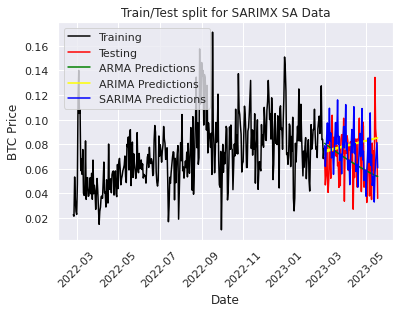

In [134]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for SARIMX SA Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_outSARIMAX, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.savefig("Test_Train_split_SARIMX_Pred_SA.png", dpi=300)
plt.show()

In [135]:
sarima_rmse = np.sqrt(mean_squared_error(test["result"].values, y_pred_df["Predictions"]))
print("SARIMA RMSE: ",sarima_rmse)

SARIMA RMSE:  0.025880684294254375


In [16]:
pip install ipy_table

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for ipy_table: filename=ipy_table-1.15.1-py3-none-any.whl size=18744 sha256=b88de804c90c42d680ea2e80e4f58dadfbeb88d87732af9333d3e16c1e372620
  Stored in directory: /home/hduser/.cache/pip/wheels/e9/5c/49/5e9d7924df16a11e23bcdcca4eab6105c2aaec80f72c66c641
Successfully built ipy_table
Note: you may need to restart the kernel to use updated packages.


In [136]:
# the best model is ARAM as it ths the lowst rmse error
print("ARMA RMSE: ",arma_rmse)
print("ARIMA RMSE: ",arima_rmse)
print("SARIMA RMSE: ",sarima_rmse)
tables = {"ARMA RMSE" : [arma_rmse],"ARIMA RMSE": [arima_rmse],"SARIMA RMSE" : [sarima_rmse] } 
t_df = pd.DataFrame(tables)

ARMA RMSE:  0.02078733649950192
ARIMA RMSE:  0.022652437209927122
SARIMA RMSE:  0.025880684294254375


In [137]:
from ipy_table import make_table, set_row_style
# Convert DataFrame to a list of lists and then use it with ipy_table
table_data = [t_df.columns.to_list()] + t_df.values.tolist()
table = make_table(table_data)
set_row_style(0, color='lightGreen')
# Apply some styles to the table
# apply_theme('basic')

table


ARMA RMSE,ARIMA RMSE,SARIMA RMSE
0.0208,0.0227,0.0259


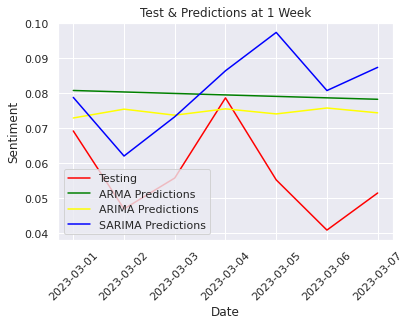

In [138]:
#plt.plot(train, color = "black", label = 'Training')
plt.plot(test.iloc[0:7], color = "red", label = 'Testing')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Test & Predictions at 1 Week")
plt.plot(y_pred_outARMA.iloc[0:7], color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA.iloc[0:7], color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_outSARIMAX.iloc[0:7], color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.savefig("Test_Predictions_1_Week.png", dpi=300)
plt.show()

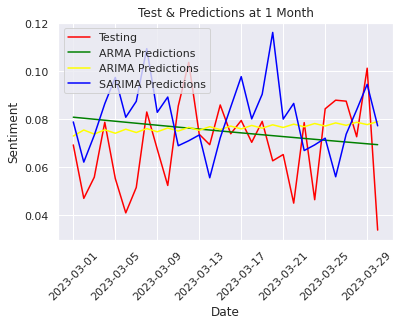

In [139]:
#plt.plot(train, color = "black", label = 'Training')
plt.plot(test.iloc[0:30], color = "red", label = 'Testing')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Test & Predictions at 1 Month")
plt.plot(y_pred_outARMA.iloc[0:30], color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA.iloc[0:30], color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_outSARIMAX.iloc[0:30], color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.savefig("Test_Predictions_1_Month.png", dpi=300)
plt.show()

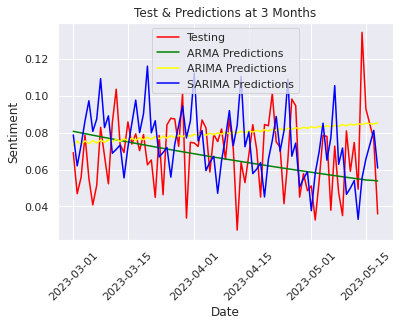

In [140]:
#plt.plot(train, color = "black", label = 'Training')
plt.plot(test.iloc[0:], color = "red", label = 'Testing')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Test & Predictions at 3 Months")
plt.plot(y_pred_outARMA.iloc[0:], color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA.iloc[0:], color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_outSARIMAX.iloc[0:], color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.savefig("Test_Predictions_3_Month.png", dpi=300)
plt.show()

In [141]:
# im going to save the forecast series out as a dataframe to make things easier later on
forecast_df = pd.DataFrame({'ARMA': y_pred_outARMA.iloc[0:], 'ARIMA': y_pred_outARIMA.iloc[0:],'SARIMAX' : y_pred_outSARIMAX.iloc[0:]} )
forecast_df.head()

,ARMA,ARIMA,SARIMAX
date_extracted,,,
2023-03-01,0.080699,0.072846,0.078724
2023-03-02,0.080274,0.075363,0.061982
2023-03-03,0.079852,0.073645,0.073198
2023-03-04,0.079432,0.075454,0.086324
2023-03-05,0.079014,0.074007,0.097280


In [142]:
# combining my forecast dataframe with the test datframe
fdf = forecast_df.merge(test, left_index=True, right_index=True)
fdf.head()

,ARMA,ARIMA,SARIMAX,result
date_extracted,,,,
2023-03-01,0.080699,0.072846,0.078724,0.069141
2023-03-02,0.080274,0.075363,0.061982,0.046882
2023-03-03,0.079852,0.073645,0.073198,0.055703
2023-03-04,0.079432,0.075454,0.086324,0.078585
2023-03-05,0.079014,0.074007,0.097280,0.055173


In [143]:
fdf.to_csv('forecast.csv')

In [144]:
fdf = pd.read_csv('forecast.csv')

# Dashboard

In [153]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 KB 831.9 kB/s eta 0:00:001m749.4 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [145]:
from sklearn.metrics import mean_squared_error
from IPython.display import display
import ipywidgets as widgets

# Function to compute RMSE
def eval_rmse(series1, series2):
    return np.sqrt(mean_squared_error(series1, series2))


In [146]:
# Create a function to display and compare data
def compare_columns(col1, col2, col3, target_col):
    target_data = fdf[target_col]
    rmse_1 = eval_rmse(fdf[col1], target_data)
    rmse_2 = eval_rmse(fdf[col2], target_data)
    rmse_3 = eval_rmse(fdf[col3], target_data)
    
    print(f"RMSE for {col1} vs {target_col}: {rmse1}")
    print(f"RMSE for {col2} vs {target_col}: {rmse2}")
    print(f"RMSE for {col3} vs {target_col}: {rmse3}")
    
        # Plot time series
    plt.figure(figsize=(14, 7))
    plt.plot(fdf[ref_col], label=f'{ref_col} (reference)')
    plt.plot(fdf[col1], label=f'{col1} (RMSE: {rmse1:.2f})')
    plt.plot(fdf[col2], label=f'{col2} (RMSE: {rmse2:.2f})')
    plt.plot(fdf[col3], label=f'{col3} (RMSE: {rmse3:.2f})')
    plt.title('Time Series Comparison')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# Create interactive widgets
col1_widget = widgets.Dropdown(options=fdf['ARMA'].tolist(), description='ARMA:')
col2_widget = widgets.Dropdown(options=fdf['ARIMA'].tolist(), description='ARIMA:')
col3_widget = widgets.Dropdown(options=fdf['SARIMAX'].tolist(), description='SARIMAX:')
target_col_widget = widgets.Dropdown(options=fdf['result'].tolist(), description='result:')

# Create a button to view comparison
compare_button = widgets.Button(description="Compare Columns")

# Event handler for the button
def on_compare_button_clicked(b):
    compare_columns(col1_widget.value, col2_widget.value, col3_widget.value, target_col_widget.value)

compare_button.on_click(on_compare_button_clicked)

# Display the widgets
display(col1_widget, col2_widget, col3_widget, target_col_widget, compare_button)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


In [ ]:
# the ubuntu jupyter note book broke here after installing voila , this happened last year on my mac 
# 500 : Internal Server Error
# If I close notebook, I will need to reinstall the notebook before it will work again
#for this reason i was forced to do the last part of this on a copy of this notebook.
# but on a windows enviroument